In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests
import io

#https://www.geeksforgeeks.org/principal-component-analysis-with-python/

In [3]:
#import BRCA dataset from Kaggle
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

dataset2 =  pd.read_csv(io.StringIO(download.decode('utf-8')))
#print (dataset1.head())

dataset = pd.read_csv('/Users/chloeyachanin/Desktop/brca_data_w_subtypes.csv')

#clean up dataset for PCA
#identifying where string values present in dataset
string_columns = dataset.select_dtypes(include=['object']).columns.tolist()
print(string_columns)
#print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']])

dataset = dataset.fillna(0)
#changing values in string dataset to numeric values
value_map = {'Positive': 1, 'Negative': 2, 'infiltrating ductal carcinoma': 3, 'infiltrating lobular carcinoma': 4, 'Performed but Not Available':0, 'Not Performed':0, 'Equivocal': 5, 'Indeterminate':6, 'Not Available':0, None: 0}

check_columns = ['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']  # list of string column names

string_value = 'Negative'

for index, row in dataset.iterrows():
    for string_column in check_columns:
        if row[string_column] in value_map:
            dataset.at[index, string_column] = value_map[row[string_column]]
       
print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']]) 

#save new dataset
dataset.to_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv', index=False)



['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']
    PR.Status ER.Status HER2.Final.Status histological.type
0           1         1                 2                 3
1           1         2                 2                 3
2           1         1                 2                 3
3           1         1                 2                 3
4           1         1                 2                 3
..        ...       ...               ...               ...
700         0         0                 0                 4
701         0         0                 0                 4
702         0         0                 0                 4
703         0         0                 0                 4
704         0         0                 0                 4

[705 rows x 4 columns]


0      3
1      3
2      3
3      3
4      3
      ..
700    4
701    4
702    4
703    4
704    4
Name: histological.type, Length: 705, dtype: int64
[0.08144044 0.06107846]
Explained variation per principal component: [0.08144044 0.06107846]
0    1.0
1    0.0
Name: PC1, dtype: float64


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

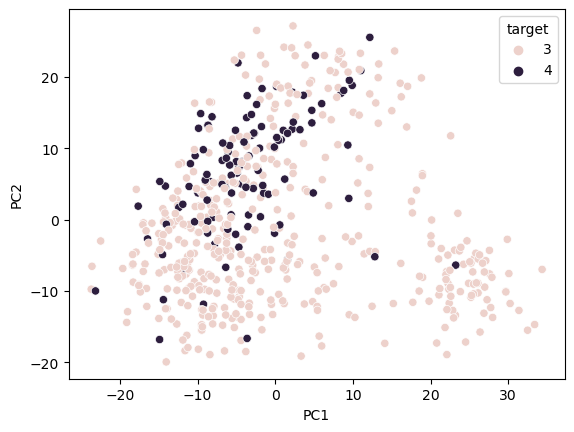

In [51]:
#importg new dataset
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/modified_brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

modified_dataset2 =  pd.read_csv(io.StringIO(download.decode('utf-8')))

modified_dataset = pd.read_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv')

string_columns = modified_dataset.select_dtypes(include=['object']).columns.tolist()
#print(string_columns)
#print(modified_dataset['PR.Status'][700])
print(modified_dataset.iloc[:, -1])

#distribute data into two components X and Y
X = modified_dataset2.iloc[:, 0:1940].values
y = modified_dataset2.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

X_train_df = pd.DataFrame(X_train)

# Fit PCA to the training set
pca = PCA(n_components=2)
pca.fit(X_train_df)

# Get the loadings for the first two principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train_df.columns)

# Print the top 5 variables with the highest loading for PC1
print(loadings['PC1'].sort_values(ascending=False)[:5])

import seaborn as sns

# Create a new dataframe with the first two principal components
pca_df = pd.DataFrame(X_train[:, :2], columns=['PC1', 'PC2'])

# Add the target variable to the dataframe
pca_df['target'] = y_train

# Create a scatter plot with the first two principal components
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target')

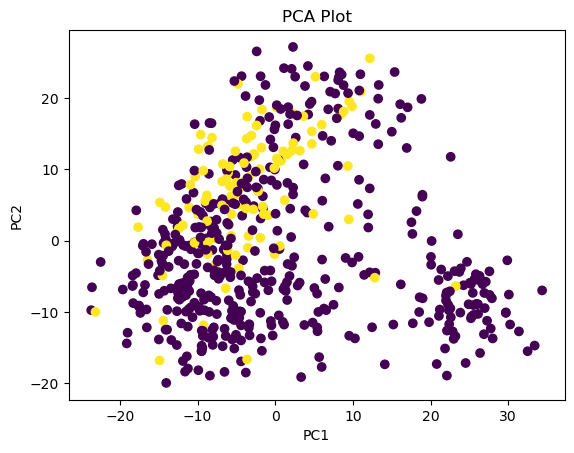

In [48]:
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)

# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

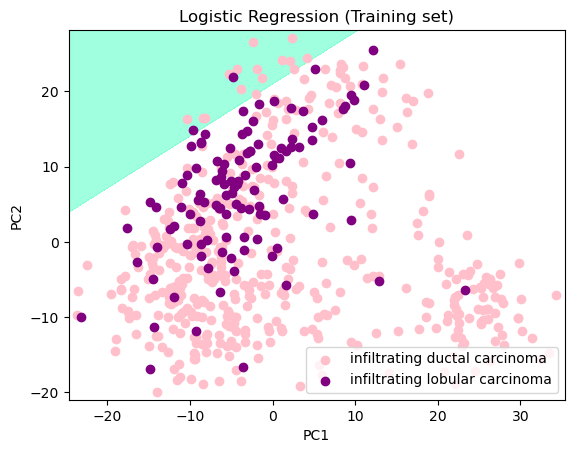

In [6]:
# Predicting the training set result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a ListedColormap for the scatter plot
cmap_scatter = ListedColormap(('pink', 'purple', 'turquoise'))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Loadings Plot)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

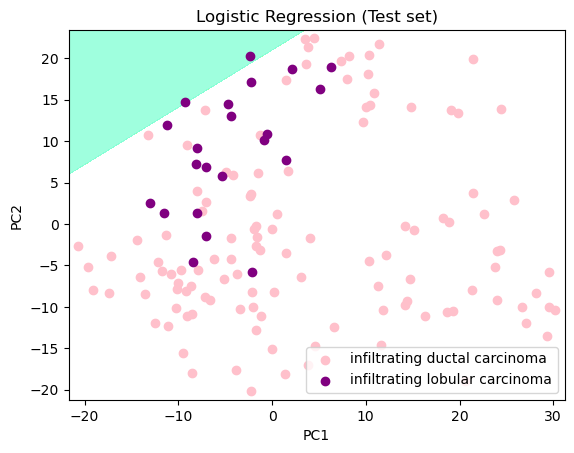

In [7]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X_test, y_test
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])
  
# title for scatter plot
plt.title('Logistic Regression (Scores Plot)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()



In [40]:
#trying different visualization method
import numpy as np

#modified = pd.read_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv')
#modified.shape
#features = modified.columns.tolist()
#labels = modified.index.tolist()



#features_labels = np.append(features, 'label')

In [41]:
x = modified_dataset2.iloc[:, 0:1940].values
x = StandardScaler().fit_transform(x)
x.shape

(705, 1940)

In [42]:
np.mean(x), np.std(x)

(4.36393871491178e-19, 1.0)

In [43]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature1930,feature1931,feature1932,feature1933,feature1934,feature1935,feature1936,feature1937,feature1938,feature1939
700,-0.915264,-0.304579,0.694262,0.824910,0.726045,-0.847384,-1.097542,-0.703454,1.296679,1.132519,...,-4.373531,-1.360676,0.288570,-0.164106,0.893647,1.115345,-0.392232,-1.364948,-1.423929,-1.620262
701,-0.464012,-0.332743,-0.134785,-0.402969,0.877044,-1.077290,-0.364147,0.133450,-0.498720,-0.182234,...,-1.017095,-0.755549,-1.164198,0.308392,-0.973403,1.608310,2.549510,-1.364948,-1.423929,-1.620262
702,-0.258944,0.043658,1.005767,0.257225,0.963635,0.934578,-0.815315,0.415156,-0.931803,0.062282,...,0.538998,0.690288,0.250780,-0.581380,-0.665716,-0.634038,2.549510,-1.364948,-1.423929,-1.620262
703,1.453164,0.034654,0.866772,0.769419,1.304845,-0.267658,0.384147,0.286270,0.582857,0.380283,...,-0.055853,-0.069386,-0.769476,-0.711353,-0.294563,-0.441342,-0.392232,-1.364948,-1.423929,-1.620262
704,-0.575628,-1.223040,1.341835,1.099273,1.335268,1.555113,1.449995,0.043038,0.477692,0.401595,...,-0.237414,0.422241,-0.339123,-1.222833,1.517724,-1.358148,-0.392232,-1.364948,-1.423929,-1.620262


In [44]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()


,principal component 1,principal component 2
700,0.687234,5.608463
701,-13.565584,3.546232
702,-8.413158,-2.800075
703,-8.748979,1.499521
704,-10.284164,9.009274


In [19]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))
print("PC1 holds 8.1% of the information while PC2 holds 6.1%")

Explained variation per principal component: [0.08177306 0.06177593]
PC1 holds 8.1% of the information while PC2 holds 6.1%


<Figure size 640x480 with 0 Axes>

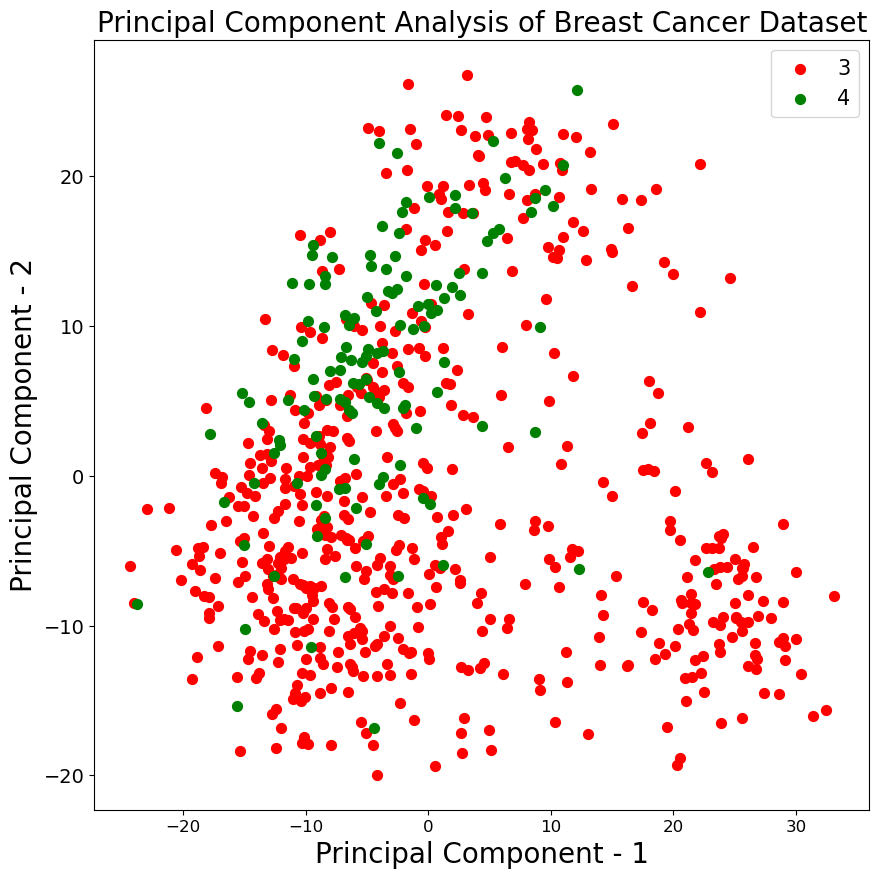

In [47]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [3, 4]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = modified_dataset2['histological.type'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
